# Lecture 2. Python packages

## Practice

In [3]:
import random
data = [random.randint(0,10) for i in range(10)]

In [4]:
data

[2, 8, 1, 8, 8, 4, 5, 1, 8, 7]

In [13]:
def linear_search(x):
  for index, value in enumerate(data):
    if value == x:
      return index
  return -1

linear_search(8) # -> 1

1

## Numpy

In [15]:
import numpy as np

In [16]:
# ndarray
x = np.array([1,2,3], np.int32)

In [18]:
x = np.append(x, np.int32(4))

In [27]:
print(type(x))
print(x.shape)
print(x.dtype)
print(x[1])
print(x[:2])

<class 'numpy.ndarray'>
(4,)
int32
2
[1 2]


In [33]:
%timeit a=[i**2 for i in list(range(10000))]

100 loops, best of 3: 2.98 ms per loop


In [35]:
%timeit b=np.arange(10000)**2

The slowest run took 42.95 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 19.9 µs per loop


In [39]:
x = np.array([[1,2],[3,4], [5,6]])
x.shape

(3, 2)

In [43]:
x.reshape(2,3).shape

(2, 3)

In [46]:
a = np.random.rand(10)
print(a.sum())
print(a.mean())
print(a.max())

4.826233624851015
0.48262336248510146
0.8716286234759464


In [48]:
a = np.random.rand(10)
b = np.random.rand(10)

print(a + b)
print(a * b)

[0.63694413 0.94302181 0.89342007 0.314476   0.59364669 0.52312746
 1.57971313 1.65320985 1.89843444 0.91184359]
[0.0052008  0.02133426 0.04320601 0.02352025 0.08790294 0.06814393
 0.60549184 0.66920723 0.90010557 0.01013045]


In [72]:
f = 0.75
t  = np.arange(0, 10, 0.125)
signal = np.sin(2*np.pi*f*t)

In [73]:
spectrum = np.fft.fft(signal)
frequencies = np.fft.fftfreq(t.shape[-1])

In [53]:
import matplotlib.pyplot as plt

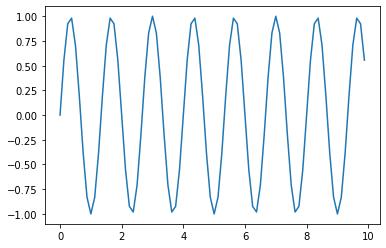

In [74]:
plt.plot(t, signal)

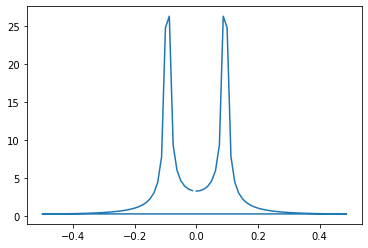

In [75]:
plt.plot(frequencies, np.abs(spectrum))

## Pandas

In [76]:
import pandas as pd

In [78]:
pd.Series([1,2,3,np.nan, 4])

0    1.0
1    2.0
2    3.0
3    NaN
4    4.0
dtype: float64

In [79]:
pd.DataFrame({
    "one": pd.Series([1,2,3,np.nan, 4]),
    "two": pd.Series([5,6,7,8,9])
})

,one,two
0,1.0,5
1,2.0,6
2,3.0,7
3,NaN,8
4,4.0,9


In [80]:
dataset = pd.read_csv("https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2019-financial-year-provisional/Download-data/annual-enterprise-survey-2019-financial-year-provisional-size-bands-csv.csv")

In [82]:
dataset.head()

,year,industry_code_ANZSIC,industry_name_ANZSIC,rme_size_grp,variable,value,unit
0,2011,A,"Agriculture, Forestry and Fishing",a_0,Activity unit,46134,COUNT
1,2011,A,"Agriculture, Forestry and Fishing",a_0,Rolling mean employees,0,COUNT
2,2011,A,"Agriculture, Forestry and Fishing",a_0,Salaries and wages paid,279,DOLLARS(millions)
3,2011,A,"Agriculture, Forestry and Fishing",a_0,"Sales, government funding, grants and subsidies",8187,DOLLARS(millions)
4,2011,A,"Agriculture, Forestry and Fishing",a_0,Total income,8866,DOLLARS(millions)


In [91]:
dataset["year_norm"] =  dataset["year"] - 2000

In [92]:
dataset.head()

,year,industry_code_ANZSIC,industry_name_ANZSIC,rme_size_grp,variable,value,unit,year_norm
0,2011,A,"Agriculture, Forestry and Fishing",a_0,Activity unit,46134,COUNT,11
1,2011,A,"Agriculture, Forestry and Fishing",a_0,Rolling mean employees,0,COUNT,11
2,2011,A,"Agriculture, Forestry and Fishing",a_0,Salaries and wages paid,279,DOLLARS(millions),11
3,2011,A,"Agriculture, Forestry and Fishing",a_0,"Sales, government funding, grants and subsidies",8187,DOLLARS(millions),11
4,2011,A,"Agriculture, Forestry and Fishing",a_0,Total income,8866,DOLLARS(millions),11


In [93]:
dataset.describe()

,year,year_norm
count,13932.000000,13932.000000
mean,2015.000000,15.000000
std,2.582082,2.582082
min,2011.000000,11.000000
25%,2013.000000,13.000000
50%,2015.000000,15.000000
75%,2017.000000,17.000000
max,2019.000000,19.000000


In [94]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


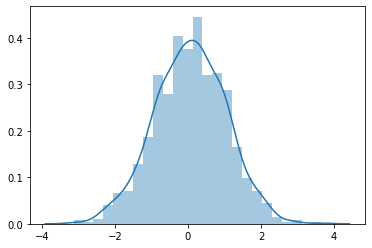

In [97]:
sns.distplot(np.random.randn(1000))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


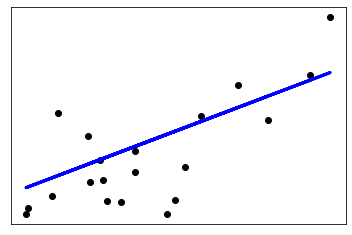

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [101]:
# https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py

import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
